In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install catboost -q

     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import shutil
import seaborn as sns
from time import time
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#from sklearn.preprocessing import One_Hot_Encoder
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/rcgautograd1.csv')


In [ ]:
data

,input_0,input_1,input_2,input_3,input_4,output_0,output_1,output_2,output_3,output_4
0,10.0,12.0,0.0,17.0,11.0,2.0,14.0,9.0,20.0,5.0
1,2.0,1.0,16.0,13.0,9.0,5.0,2.0,9.0,20.0,16.0
2,10.0,18.0,14.0,13.0,5.0,5.0,10.0,13.0,14.0,18.0
3,18.0,11.0,0.0,16.0,20.0,2.0,9.0,16.0,18.0,20.0
4,20.0,16.0,3.0,11.0,10.0,1.0,14.0,9.0,15.0,20.0
...,...,...,...,...,...,...,...,...,...,...
2495,14.0,12.0,3.0,20.0,5.0,2.0,17.0,20.0,7.0,19.0
2496,6.0,3.0,19.0,14.0,7.0,3.0,6.0,7.0,14.0,19.0
2497,2.0,13.0,20.0,3.0,19.0,7.0,2.0,13.0,19.0,20.0
2498,4.0,16.0,5.0,8.0,20.0,18.0,1.0,8.0,16.0,20.0


In [ ]:
input=data[data.columns[:5]]
output=data[data.columns[-5:]]

In [ ]:
X=np.zeros((input.shape[0],21))
y=np.zeros((input.shape[0],21),'int16')
for ind,x in enumerate(input.values.astype(int)):
  X[ind,x]=1#range(1,6)[::-1]
for ind,n in enumerate(output.values.astype(int)):
  y[ind,n]=1

In [ ]:
y[0]

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
      dtype=int16)

In [ ]:
def my_metric(pred,actual):
  number=[]
  for ind,pre in enumerate(pred):
    act=np.argsort(actual[ind])[-5:]
    number.append(np.isin(act,pre).sum())
  return np.mean(number)
def top_5(value):
  li=[]
  for val in value:
    li.append(list(np.argsort(val)[-5:]))
  return li

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)
actual_locs=top_5(y_test)

In [ ]:
train=np.concatenate([X_train,y_train[:,0].reshape(-1,1)],axis=1)

In [ ]:
from random import seed
from random import randrange
from csv import reader
from math import sqrt

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

# Locate the best matching unit
def get_best_matching_unit(codebooks, test_row):
    distances = list()
    for codebook in codebooks:
        dist = euclidean_distance(codebook, test_row)
        distances.append((codebook, dist))
    distances.sort(key=lambda tup: tup[1])
    return distances[0][0]
def get_best_k_matching_units(codebooks,test_row,k):
  distances = list()
  for codebook in codebooks:
      dist = euclidean_distance(codebook, test_row)
      distances.append((codebook, dist))
  distances.sort(key=lambda tup: tup[1])
  return distances[:k]
def get_closest_1(codebooks,test_row):
  distances = list()
  for codebook in codebooks :
    if codebook[-1]==1:
      dist = euclidean_distance(codebook, test_row)
      distances.append((codebook, dist))
  distances.sort(key=lambda tup: tup[1])
  return distances[0][1]
# Make a prediction with codebook vectors
def predict_best(codebooks, test_row):
    bmu = get_best_matching_unit(codebooks, test_row)
    return bmu[-1]

# Create a random c lol ppq0qqqqodebook vector
def random_codebook(train,n_codebooks):
    code_indices=np.random.choice(range(train.shape[0]),n_codebooks,replace=False)
    codebooks=train[code_indices]
    return codebooks

# Train a set of codebook vectors
def train_codebooks(train, self):
    codebooks=random_codebook(train,self.n_codebooks)
    for epoch in range(self.n_epochs):
        rate = self.lr * (1.0-(epoch/float(self.n_epochs)))
        for row in train:
            bmu = get_best_matching_unit(codebooks, row)
            for i in range(len(row)-1):
                error = row[i] - bmu[i]
                if bmu[-1] == row[-1]:
                    bmu[i] += rate * error
                else:
                    bmu[i] -= rate * error
    return codebooks

# LVQ Algorithm
n_folds = 5
learn_rate = 0.3
n_epochs = 50
n_codebooks = 20

In [ ]:
class LVQ():
  def __init__(self,n_codebooks=50,k=10,n_epochs=10,lr=0.3,seed=42):
        self.n_codebooks = n_codebooks
        self.n_epochs = n_epochs
        self.k = k
        self.lr = lr
        self.seed=seed
  def fit(self,X_train,y_train):
    train=np.concatenate([X_train,y_train.reshape(-1,1)],axis=1)
    np.random.seed(self.seed)
    trained_codebooks=train_codebooks(train,self)
    self.trained_codebooks=trained_codebooks
    return trained_codebooks
    #return trained_codebooks[:,-1]
  def predict(self,test_X):
    self.preds=np.zeros(test_X.shape[0])
    for num,test_row in enumerate(test_X):
        self.preds[num]=predict_best(self.trained_codebooks,test_row)
    return self.preds
  def predict_distances(self,test_X):
    k_closest=np.zeros((test_X.shape[0],self.k))
    for num,test_row in enumerate(test_X):
        k_best=get_best_k_matching_units(self.trained_codebooks,test_row,self.k)
        for ind,dist in enumerate(k_best):
          if dist[0][-1]==0:
            k_closest[num,ind]=dist[1]*-1
          else :
            k_closest[num,ind]=dist[1]
    return k_closest
  def predict_proba(self,test_X):
    closest=np.zeros((test_X.shape[0]))
    for num,test_row in enumerate(test_X):
        closest[num]=1/(get_closest_1(self.trained_codebooks,test_row))
    return closest

In [ ]:
class multi_class():
  def __init__(self,model):
        self.n_codebooks = model.n_codebooks
        self.n_epochs = model.n_epochs
        self.k = model.k
        self.lr = model.lr
        self.seed=model.seed
        self.model=model
        self.codebooks=[]
  def fit(self,X,y):
    self.n_classes=y.shape[1]
    for num in tqdm(range(y.shape[1])):
      model=self.model
      model=model.fit(X,y[:,num])
      self.codebooks.append(model)
  def predict(self,test):
    preds=np.zeros((test.shape[0],self.n_classes))
    for num,codebook in enumerate(self.codebooks):
      for ind,test_row in enumerate(test):
        bmu = get_best_matching_unit(codebook, test_row)
        preds[ind,num]=bmu[-1]
    return preds
  def predict_proba(self,test_X):
    preds=np.zeros((test_X.shape[0],self.n_classes))
    for num,model in enumerate(self.codebooks):
      for ind,test_row in enumerate(test_X):
        preds[ind,num]=1/(get_closest_1(model,test_row))
    return preds

In [ ]:
# creating dummy_model i.e random predictions
import random,numpy
# seeding the environment to enable reproductibility of results
seed=12
np.random.seed(seed)
rand_cities =np.random.choice(range(y_train.shape[1]),(X_test.shape[0],5))
random_test_score=my_metric(rand_cities,y_test)
print("Mean no of accurate locations for test ",random_test_score )

Mean no of accurate locations for test  1.0826666666666667


In [ ]:
def eval_model(model):
  test_acc=accuracy_score(y_test.reshape(-1),model.predict(X_test).reshape(-1))
  train_acc=accuracy_score(y_train.reshape(-1),model.predict(X_train).reshape(-1))
  return test_acc,train_acc

In [ ]:
fit_time=[]
predict_time=[]
models=[]
test_scores=[]
train_scores=[]
test_acc=[]
train_acc=[]
descr=[]
def save_model_info(fit,predict,model,test_score,train_score,train,test,desc):
  fit_time.append(fit)
  predict_time.append(predict)
  models.append(model)
  test_acc.append(test)
  train_acc.append(train)
  test_scores.append(test_score)
  train_scores.append(train_score)
  descr.append(desc)

In [ ]:
%%capture
#import futures
'''executor = futures.ProcessPoolExecutor(10)
futures = [executor.submit(try_my_operation, item) for item in items]
futures.wait(futures)'''

In [ ]:
lv=LVQ(n_codebooks=50,lr=0.2,n_epochs=20)
mcLVQ=multi_class(lv)
start_fit=time()
mcLVQ.fit(X_train,y_train)
end_fit=time()
lvq_proba=mcLVQ.predict_proba(X_test)
lvq_train_proba=mcLVQ.predict_proba(X_train)
end_pred=time()
predicted_locs=top_5(lvq_proba)
test_score=my_metric(predicted_locs,y_test)
train_score=my_metric(top_5(lvq_train_proba),y_train)
print("Mean no of accurate locations for test ",test_score)
print("Mean no of accurate locations for train ",train_score)
train_accuracy,test_accuracy=eval_model(mcLVQ)
print("The test accuracy score for mcLVQ is ",test_accuracy)
print("The train accuracy score for mcLVQ is ",train_accuracy)
save_model_info(end_fit-start_fit,end_pred-end_fit,'mcLVQ',test_score,train_score,train_accuracy,test_accuracy,'lvq model with 50 codebooks')

100%|██████████| 21/21 [08:29<00:00, 24.26s/it]


Mean no of accurate locations for test  3.3586666666666667
Mean no of accurate locations for train  3.693142857142857
The test accuracy score for mcLVQ is  0.9128435374149659
The train accuracy score for mcLVQ is  0.8573968253968254


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=150)
knn=MultiOutputClassifier(kn)
start_fit=time()
knn.fit(X_train,y_train)
end_fit=time()
knn_proba=np.stack(knn.predict_proba(X_test), axis=1 )[:,:,1]
knn_train_proba=np.stack(knn.predict_proba(X_train), axis=1 )[:,:,1]
end_pred=time()
predicted_locs=top_5(knn_proba)
test_score=my_metric(predicted_locs,y_test)
train_score=my_metric(top_5(knn_train_proba),y_train)
print("Mean no of accurate locations for test ",test_score)
print("Mean no of accurate locations for train ",train_score)
train_accuracy,test_accuracy=eval_model(knn)
print("The test accuracy score for knn is ",test_accuracy)
print("The train accuracy score for knn is ",train_accuracy)
save_model_info(end_fit-start_fit,end_pred-end_fit,'knn',test_score,train_score,train_accuracy,test_accuracy,'KNearestNeighborsClassifier with k as 150')

Mean no of accurate locations for test  3.328
Mean no of accurate locations for train  3.334285714285714
The test accuracy score for knn is  0.8276190476190476
The train accuracy score for knn is  0.8281904761904761


In [ ]:
r=RandomForestClassifier(n_estimators=500,max_depth=20,min_samples_split=2,max_features=0.2,random_state=12, max_samples=0.8)
rf=MultiOutputClassifier(r)
start_fit=time()
rf.fit(X_train,y_train)
end_fit=time()
rf_proba=np.stack(rf.predict_proba(X_test), axis=1 )[:,:,1]
rf_train_proba=np.stack(rf.predict_proba(X_train), axis=1 )[:,:,1]
end_pred=time()
predicted_locs=top_5(rf_proba)
test_score=my_metric(predicted_locs,y_test)
train_score=my_metric(top_5(rf_train_proba),y_train)
print("Mean no of accurate locations for test ",test_score )
print("Mean no of accurate locations for train ",train_score )
train_accuracy,test_accuracy=eval_model(rf)
print("The test accuracy score for Random_forest is ",test_accuracy)
print("The train accuracy score for Random_forest is ",train_accuracy)
save_model_info(end_fit-start_fit,end_pred-end_fit,'rf',test_score,train_score,train_accuracy,test_accuracy,'RandomForest with depth of 20')

Mean no of accurate locations for test  3.8986666666666667
Mean no of accurate locations for train  5.0
The test accuracy score for Random_forest is  0.9999727891156462
The train accuracy score for Random_forest is  0.8966349206349207


In [ ]:
l=LogisticRegression(C=1,max_iter=1000)
lr=MultiOutputClassifier(l)
start_fit=time()
lr.fit(X_train,y_train)
end_fit=time()
lr_proba=np.stack(lr.predict_proba(X_test), axis=1 )[:,:,1]
lr_train_proba=np.stack(lr.predict_proba(X_train), axis=1 )[:,:,1]
end_pred=time()
predicted_locs=top_5(lr_proba)
test_score=my_metric(predicted_locs,y_test)
train_score=my_metric(top_5(lr_train_proba),y_train)
print("Mean no of accurate locations for test ",test_score )
print("Mean no of accurate locations for train ",train_score )
train_accuracy,test_accuracy=eval_model(lr)
print("The test accuracy score for logistic regression is ",test_accuracy)
print("The train accuracy score for logistic regression is ",train_accuracy)
save_model_info(end_fit-start_fit,end_pred-end_fit,'lr',test_score,train_score,train_accuracy,test_accuracy,' A basic logistic regression with C as 10')

Mean no of accurate locations for test  3.469333333333333
Mean no of accurate locations for train  3.5525714285714285
Mean no of accurate locations for test  0.8594285714285714
Mean no of accurate locations for train  0.8614421768707483


In [ ]:
xg=XGBClassifier(n_estimators=650 , max_depth=5, learning_rate=0.08,colsample_bytree=0.25,
                  random_state=12,subsample=0.8)
xgb=MultiOutputClassifier(xg)
start_fit=time()
xgb.fit(X_train,y_train)
end_fit=time()
xgb_proba=np.stack(xgb.predict_proba(X_test), axis=1 )[:,:,1]
xgb_train_proba=np.stack(xgb.predict_proba(X_train), axis=1 )[:,:,1]
end_pred=time()
predicted_locs=top_5(xgb_proba)
test_score=my_metric(predicted_locs,y_test)
train_score=my_metric(top_5(xgb_train_proba),y_train)
print("Mean no of accurate locations for test ",test_score )
print("Mean no of accurate locations for train ",train_score )
train_accuracy,test_accuracy=eval_model(xgb)
print("The test accuracy score for XGBoost is ",test_accuracy)
print("The train accuracy score for XGBoost is ",train_accuracy)
save_model_info(end_fit-start_fit,end_pred-end_fit,'xgb',test_score,train_score,train_accuracy,test_accuracy,'A simple xgboost model')

Mean no of accurate locations for test  3.8453333333333335
Mean no of accurate locations for train  4.610285714285714
Mean no of accurate locations for test  0.8925079365079365
Mean no of accurate locations for train  0.9578231292517007


In [ ]:
ct= CatBoostClassifier(loss_function= 'MultiClass',learning_rate= 0.08,iterations= 600,depth= 6,
                        subsample=0.8,bootstrap_type='Bernoulli',colsample_bylevel=0.2,random_seed= 12,verbose= False)
cat=MultiOutputClassifier(ct)
start_fit=time()
cat.fit(X_train,y_train)
end_fit=time()
cat_proba=np.stack(cat.predict_proba(X_test), axis=1 )[:,:,1]
cat_train_proba=np.stack(cat.predict_proba(X_train), axis=1 )[:,:,1]
end_pred=time()
predicted_locs=top_5(cat_proba)
test_score=my_metric(predicted_locs,y_test)
train_score=my_metric(top_5(cat_train_proba),y_train)
print("Mean no of accurate locations for test ",test_score )
print("Mean no of accurate locations for train ",train_score )
train_accuracy,test_accuracy=eval_model(cat)
print("The test accuracy score for CATBoost is ",test_accuracy)
print("The train accuracy score for CATBoost is ",train_accuracy)
save_model_info(end_fit-start_fit,end_pred-end_fit,'cat',test_score,train_score,train_accuracy,test_accuracy,'A catboost model')

Mean no of accurate locations for test  3.9466666666666668
Mean no of accurate locations for train  4.958857142857143
Mean no of accurate locations for test  0.9021587301587302
Mean no of accurate locations for train  0.9924625850340136


In [ ]:
vot=VotingClassifier([('xg',xg),('rf',r),('cat',ct)],voting='soft',weights=[0.2,0.6,0.8])
vote=MultiOutputClassifier(vot)
start_fit=time()
vote.fit(X_train,y_train)
end_fit=time()
vote_proba=np.stack(vote.predict_proba(X_test), axis=1 )[:,:,1]
vote_train_proba=np.stack(vote.predict_proba(X_train), axis=1 )[:,:,1]
end_pred=time()
predicted_locs=top_5(vote_proba)
test_score=my_metric(predicted_locs,y_test)
train_score=my_metric(top_5(vote_train_proba),y_train)
print("Mean no of accurate locations for test ",test_score )
print("Mean no of accurate locations for train ",train_score )
train_accuracy,test_accuracy=eval_model(vote)
print("The test accuracy score for the Ensemble model is ",test_accuracy)
print("The train accuracy score for Ensemble model is ",train_accuracy)
save_model_info(end_fit-start_fit,end_pred-end_fit,'vote',test_score,train_score,train_accuracy,test_accuracy,'An ensemble of xgboost,random_forest and catboost')

Mean no of accurate locations for test  3.948
Mean no of accurate locations for train  4.978285714285715
Mean no of accurate locations for test  0.9008253968253969
Mean no of accurate locations for train  0.9941496598639455


In [ ]:
results_df=pd.DataFrame({'fit_time(secs)':fit_time,'predict_time(secs)':predict_time,'train_acc':train_acc,'test_acc':test_acc,'train_score':train_scores,'test_score':test_scores,'model':models,'description':descr})
results_df.drop_duplicates(['model'],keep='last',inplace=True)
results_df2=pd.read_csv('/content/results.csv')
results_df=pd.concat([results_df,results_df2])
results_df.reset_index(drop=True,inplace=True)

In [ ]:
results_df

,fit_time(secs),predict_time(secs),train_acc,test_acc,train_score,test_score,model,description,Unnamed: 0,fit_time,predict_time
0,585.269558,9.473206,0.857397,0.912844,3.693143,3.358667,mc,lvq model with 50 codebooks,NaN,NaN,NaN
1,0.030661,3.624861,0.828190,0.827619,3.334286,3.328000,knn,KNearestNeighborsClassifier with k as 150,NaN,NaN,NaN
2,20.367830,5.682886,0.896635,0.999973,5.000000,3.898667,rf,RandomForest with depth of 20,NaN,NaN,NaN
3,509.421284,9.612711,0.857397,0.912844,3.693143,3.358667,mcLVQ,lvq model with 50 codebooks,NaN,NaN,NaN
4,NaN,NaN,0.794222,0.793605,2.517714,2.545333,gnn,our gnn model,0.0,145.457107,3.742680
5,NaN,NaN,0.879365,0.893524,3.847429,3.681333,base,An artificial neural network,1.0,45.347118,0.996642


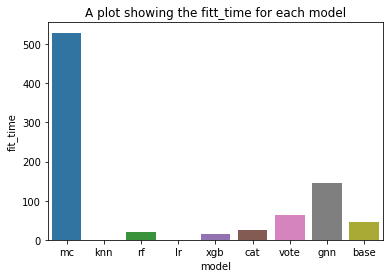

In [ ]:
sns.barplot(data=results_df,x='model',y='fit_time')
plt.title('A plot showing the fitt_time for each model')
plt.show()

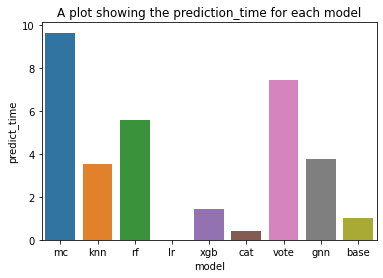

In [ ]:
sns.barplot(data=results_df,x='model',y='predict_time')
plt.title('A plot showing the prediction_time for each model')
plt.show()

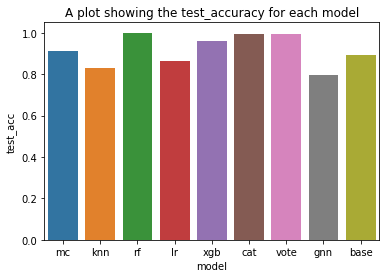

In [ ]:
sns.barplot(data=results_df,x='model',y='test_acc')
plt.title('A plot showing the test_accuracy for each model')
plt.show()

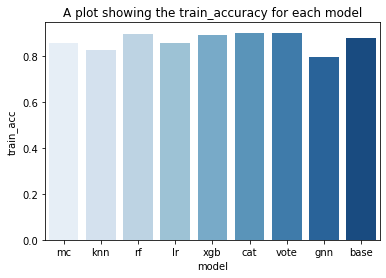

In [ ]:
sns.barplot(data=results_df,x='model',y='train_acc',palette = "Blues")
plt.title('A plot showing the train_accuracy for each model')
plt.show()

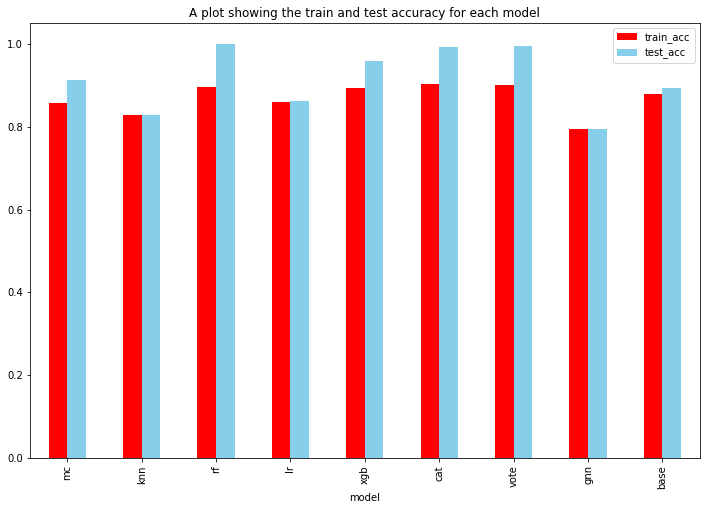

In [ ]:
results_df.plot(y=['train_acc','test_acc'],x='model',kind='bar', stacked=False, color=['red', 'skyblue'],figsize=(12,8))
plt.title('A plot showing the train and test accuracy for each model')
plt.show()

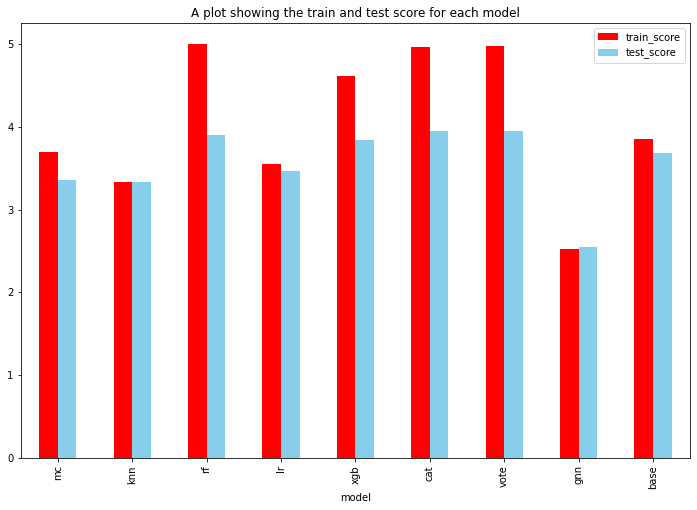

In [ ]:
results_df.plot(y=['train_score','test_score'],x='model',kind='bar', stacked=False, color=['red', 'skyblue'],figsize=(12,8))
plt.title('A plot showing the train and test score for each model')
plt.show()

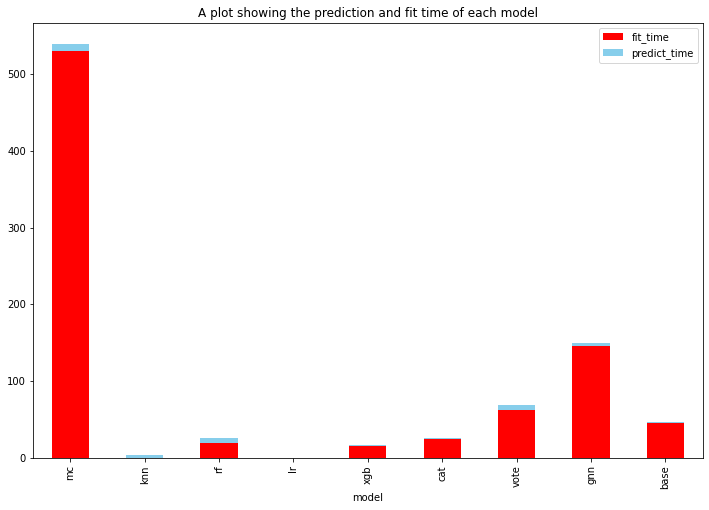

In [ ]:
results_df.plot(y=['fit_time','predict_time'],x='model',kind='bar', stacked=True, color=['red', 'skyblue'],figsize=(12,8))
plt.title('A plot showing the prediction and fit time of each model')
plt.show()